In [2]:
import pandas as pd
import model_utils as mu
import torch
import numpy as np
from sklearn.cluster import KMeans 
import random
import nn_model as nnm

NUM_SEQUENCES_PER_BATCH = 1024

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# Load the pre-trained model
embedder = nnm.Embedder('all-MiniLM-L6-v2', device=device)

In [ ]:
#load the data, tuples
similar_song_lyrics= pd.read_csv("data/kat_data_similar_songs_unique.csv") 
similar_song_lyrics.head()

,title,artist,song,similar_lyrics,similar_track,similar_artist
0,Cuéntale,Ivy Queen,Cuéntale by Ivy Queen,4 ContributorsDile LyricsQuien te va a querer ...,Dile,Ivy Queen
1,Libertad,Ivy Queen,Libertad by Ivy Queen,"13 ContributorsLa boda Lyrics[Letra de ""La Bod...",La Boda,Aventura
2,"Te He Querido, Te He Llorado",Ivy Queen,"Te He Querido, Te He Llorado by Ivy Queen",7 ContributorsQuiero Saber LyricsDJ-DJ-DJ-DJ-N...,Quiero Saber,Ivy Queen
3,Quiero Bailar,Ivy Queen,Quiero Bailar by Ivy Queen,23 ContributorsPa’ Que Retozen Lyrics[Letra de...,Pa' Que Retozen,Tego Calderón
4,Quiero Saber,Ivy Queen,Quiero Saber by Ivy Queen,6 ContributorsTe He Querido Te He Llorado Lyri...,"Te He Querido, Te He Llorado",Ivy Queen


In [26]:
#Grab the lyrics and the corresponding similar song title
lyrics, similar_song_title = similar_song_lyrics["similar_lyrics"].tolist(), similar_song_lyrics["song"].tolist()
processed_lyrics = []
for lyric in lyrics:
    processed_lyrics.append(nnm.preprocess_sentence(lyric))

In [27]:
embeddings = embedder(processed_lyrics, batch_size=NUM_SEQUENCES_PER_BATCH).cpu().numpy()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sentence_embeddings_scaled = scaler.fit_transform(embeddings)

In [29]:
#initalize the model
kmeans = KMeans(n_clusters=10,init='k-means++',max_iter=3000,n_init=1,random_state=0)

#fit the model to a line
model = kmeans.fit(embeddings)

predicted_values = model.predict(embeddings)

print(predicted_values)

[1 1 6 6 1 4 4 1 6 4 4 6 6 5 4 1 1 6 4 4 6 4 4 1 1 6 4 6 6 6 4 6 4 4 6 6 1
 6 1 5 6 1 1 7 9 1 1 1 1 6 6 5 1 4 6 4 6 4 6 1 1 6 1 1 6 6 4 6 6 6 4 6 6 4
 6 1 4 4 4 6 1 6 6 6 6 0 2 7 3 0 3 3 3 5 4 5 5 5 1 5 5 1 5 1 1 5 5 5 1 1 5
 5 5 1 5 1 1 5 5 5 5 5 7 2 0 7 3 2 0 0 2 7 2 2 7 0 3 3 0 3 8 0 2 2 7 0 0 2
 9 2 2 2 8 0 7 7 7 5 2 2 0 5 3 8 7 0 5 5 9 0 9 2 0 7 2 7 3 9 3 7 0 7 5 0 0
 0 0 9 8 0 9 2 9 9 8 0 0 0 5 2 8 8 8 7 9 0 8 5 8 8 2 7 0 2 2 7 2 2 9 7 9 9
 9 0 9 9 8 2 0 2 0 8 8 0 7 8 7 2 9 9 2 8 2 8 3 9 9 8 2 8 8 8 8 8 0 9 9 3 9
 9 7 7 2 3 8 2 9 2 8 9 9 9 2 2 0 9 9 7 9 2 8 8 0 8 0 9 2 8 8 8 9 2 2 8 9 2
 9 8 9 2 9 0 0 0 2 2 2 9 8 9 2 8 8 2 9 9 9 7 9 9 8 9 2 8 8 8 8 5 8 9 8 9 3
 2 2 7 0 0 0 0 3 7 3 5 0 3 7 3 0 7 9 7 3 4 1 6 1 1 1 1 1 6 6 1 4 6 6 1 6 6
 4 6 4 9 4 8 9 8 0 8 4 6 1 9 9 2 8 6 0 5 8 0 0 0 1 0 2 8 0 3 8 2 0 6 5 7 7
 0 3 6 0 0 7 0 9 3 7 7 0 8 8 3 9 9 8 0 0 3 0 7 8 3 3 7 0 7 0 3 0 7 0 3 9 2
 3 7 7 9 4 6 1 1 7 2 3 4 7 4 3 2 4 1 1 2 6 4 6 4 6 6 6 6 6 1 6 4 6 1 6 1 6
 8 7 8 2 8 7 7 7 0 3 0 0 

In [30]:
predicted_values

array([1, 1, 6, 6, 1, 4, 4, 1, 6, 4, 4, 6, 6, 5, 4, 1, 1, 6, 4, 4, 6, 4,
       4, 1, 1, 6, 4, 6, 6, 6, 4, 6, 4, 4, 6, 6, 1, 6, 1, 5, 6, 1, 1, 7,
       9, 1, 1, 1, 1, 6, 6, 5, 1, 4, 6, 4, 6, 4, 6, 1, 1, 6, 1, 1, 6, 6,
       4, 6, 6, 6, 4, 6, 6, 4, 6, 1, 4, 4, 4, 6, 1, 6, 6, 6, 6, 0, 2, 7,
       3, 0, 3, 3, 3, 5, 4, 5, 5, 5, 1, 5, 5, 1, 5, 1, 1, 5, 5, 5, 1, 1,
       5, 5, 5, 1, 5, 1, 1, 5, 5, 5, 5, 5, 7, 2, 0, 7, 3, 2, 0, 0, 2, 7,
       2, 2, 7, 0, 3, 3, 0, 3, 8, 0, 2, 2, 7, 0, 0, 2, 9, 2, 2, 2, 8, 0,
       7, 7, 7, 5, 2, 2, 0, 5, 3, 8, 7, 0, 5, 5, 9, 0, 9, 2, 0, 7, 2, 7,
       3, 9, 3, 7, 0, 7, 5, 0, 0, 0, 0, 9, 8, 0, 9, 2, 9, 9, 8, 0, 0, 0,
       5, 2, 8, 8, 8, 7, 9, 0, 8, 5, 8, 8, 2, 7, 0, 2, 2, 7, 2, 2, 9, 7,
       9, 9, 9, 0, 9, 9, 8, 2, 0, 2, 0, 8, 8, 0, 7, 8, 7, 2, 9, 9, 2, 8,
       2, 8, 3, 9, 9, 8, 2, 8, 8, 8, 8, 8, 0, 9, 9, 3, 9, 9, 7, 7, 2, 3,
       8, 2, 9, 2, 8, 9, 9, 9, 2, 2, 0, 9, 9, 7, 9, 2, 8, 8, 0, 8, 0, 9,
       2, 8, 8, 8, 9, 2, 2, 8, 9, 2, 9, 8, 9, 2, 9,

In [31]:
def pick_random_song_from_cluster(cluster_id, songs, predicted_values):
    # Get the indices of all songs in the given cluster
    cluster_indices = np.where(predicted_values == cluster_id)[0]
    
    if len(cluster_indices) == 0:
        print(f"No songs found in cluster {cluster_id}")
        return None
    
    # Choose a random index from the cluster
    random_index = random.choice(cluster_indices)
    
    # Return the corresponding song info
    return songs.iloc[random_index]

# Example usage: pick a random song from cluster 1
random_song = pick_random_song_from_cluster(1, similar_song_lyrics["similar_track"], predicted_values)
print(random_song)

Un ratito


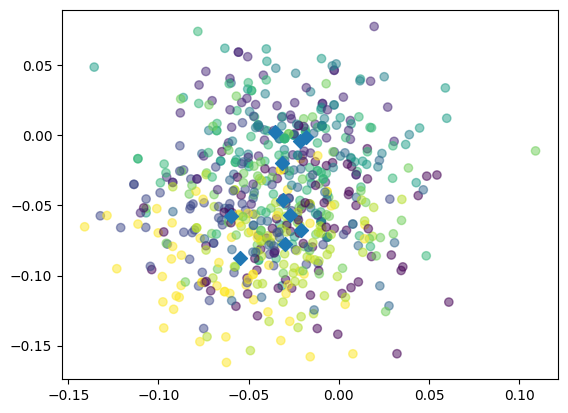

In [32]:
# Determine the cluster labels of new_points: labels
labels = kmeans.predict(embeddings)
# Import pyplot
import matplotlib.pyplot as plt
# Assign the columns of new_points: xs and ys
xs = embeddings[:,0]
ys = embeddings[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Retrieve the clustering results
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print("Cluster Labels:", labels)
print("Cluster Centers (scaled):", centers)

# Calculate silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0 2 2 0
 2 0 0 0 2 2 0 0 0 0 0 0 0 1 0 2 0 2 1 1 2 2 2 0 2 0 0 0 0 2 0 0 2 0 1 2 0
 0 0 0 2 0 2 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 0 0 2 0 2 2
 2 2 0 2 2 0 2 0 2 2 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0
 2 0 0 0 0 2 0 2 0 2 0 2 2 0 0 2 0 0 0 2 0 2 2 2 2 2 0 0 2 0 2 0 0 0 2 2 0
 2 2 2 0 2 2 2 2 0 0 0 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 0
 0 0 0 2 2 2 2 0 0 0 1 0 0 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 2 2 2 2 1 1 1 2 2 0 2 1 2 1 2 2 2 2 1 2 0 2 2 0 2 0 0 1 1 0 0
 2 0 1 0 2 0 2 2 0 0 0 2 2 2 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 0 2 0 

In [52]:
def select_random_samples_by_cluster(X, labels, target_cluster, n_number):
    """
    Select n_number random samples from the dataset X whose predicted cluster label equals target_cluster.
    
    Parameters:
      - X: numpy.ndarray, the dataset where each row is a sample.
      - labels: numpy.ndarray, the predicted cluster labels for each sample in X.
      - target_cluster: int (or appropriate type), the specific cluster label to filter by.
      - n_number: int, the number of random samples to select from the target cluster.
    
    Returns:
      - A numpy.ndarray containing the randomly selected samples from X that belong to target_cluster.
    
    Raises:
      - ValueError: If no samples are found in the target cluster or if n_number exceeds the number of available samples.
    """
    # Get the indices of all samples belonging to the target cluster
    cluster_indices = np.where(labels == target_cluster)[0]
    
    # Check if there are any samples in the cluster
    if len(cluster_indices) == 0:
        raise ValueError(f"No samples found for cluster {target_cluster}")
    
    # Check if we have enough samples in the cluster to select n_number of them
    if n_number > len(cluster_indices):
        raise ValueError(f"Requested {n_number} samples, but only {len(cluster_indices)} samples are available in cluster {target_cluster}")
    
    # Randomly choose n_number indices from the filtered indices without replacement
    random_indices = np.random.choice(cluster_indices, size=n_number, replace=False)
    
    # Return the corresponding samples from X
    return X['song'].values[random_indices]

In [53]:
def get_assigned_clusters(indices, labels):
    """
    Get the assigned clusters for a list of indices.

    Parameters:
    - indices: list of int, the indices of the data points.
    - labels: numpy.ndarray, the cluster labels for all data points.

    Returns:
    - list of int, the cluster labels for the specified indices.
    """
    return [labels[i] for i in indices]

In [54]:
print(select_random_samples_by_cluster(similar_song_lyrics, labels, 0, 5))
print(select_random_samples_by_cluster(similar_song_lyrics, labels, 1, 5))


['Impossible by Lyla Foy' "Don't Jump by Tokio Hotel"
 'Dreaming Of You by Selena' 'Japanese Denim by Daniel Caesar'
 'Someone Like You by Adele']
['Guatauba by Plan B' 'Te Quiero by Flex'
 'Porque Me Tratas Así? by Wisin & Yandel' 'No Pares by Zion & Lennox'
 'MONACO by Bad Bunny']


In [55]:
#Labels that are not similar to: FireBurning by Sean Kingston
# 252 -  'Honey' by Kehlani
# 11 - 505 by Arctic Monkeys
# 13 - 8TEEN by Khalid
# 21 - American Requiem by Beyonce

#Labels somewhat similar to : FireBurning by Sean Kingston
# 336 - Low  by Flo Rida
# 431 -Promiscuous
# 294 -Just Dance

In [56]:
potential_indices = [252, 11, 13, 21, 336, 431, 294]

get_assigned_clusters(potential_indices, labels)

[2, 1, 1, 1, 2, 0, 2]

In [57]:
fire_idxs = [2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922]
get_assigned_clusters(fire_idxs, labels)

IndexError: index 2915 is out of bounds for axis 0 with size 616

# Principal Component Analysis (PCA)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)  # Retain 95% variance
X_reduced = pca.fit_transform(X_scaled)

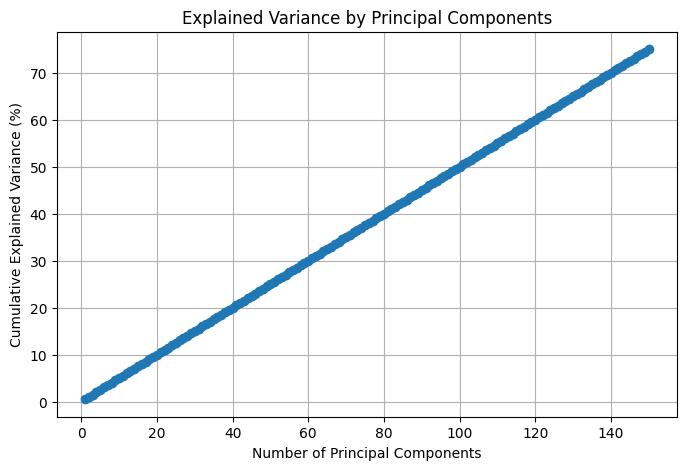

In [54]:
# Compute the cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(8, 5))
plt.plot(range(1, 150 + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()